In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm, Normalize
import matplotlib
#from bioinfokit import analys, visuz
color_palette = sns.color_palette("colorblind")

sns.set_theme(palette=color_palette, font="Arial", font_scale=1.0, style="white")
#plt.style.use('./poster.mplstyle')


matplotlib.rcParams.update({'font.size': 20, 'font.style': 'normal', 'axes.titlesize': 8, 'axes.labelsize': 20,
                           'xtick.labelsize': 20, 'ytick.labelsize': 20, 'legend.fontsize':8,
                            'text.usetex': False, 'svg.fonttype': 'none',
                            'xtick.direction' : 'out', 'ytick.direction' : 'out',
                            'xtick.bottom': True, 'ytick.left': True,})

import statsmodels.stats.multitest as smm
import numpy as np


In [4]:
#load count matrix (normalized)
counts_genes_norm = pd.read_csv("results_gene_counts_normalized_female_only_231212.csv")  
counts_genes_norm.rename(columns={"Unnamed: 0": "GENEID"}, inplace = True)
#rearrange columns
counts_genes_norm = counts_genes_norm[['GENEID', 
              'filtered_S1_quant_filtered',
              'filtered_S2_quant_filtered',
              'filtered_S4_quant_filtered',
              'filtered_S9_quant_filtered',
              'filtered_S11_quant_filtered',
              'filtered_S12_quant_filtered',]]

In [6]:
counts_genes_norm

,GENEID,filtered_S1_quant_filtered,filtered_S2_quant_filtered,filtered_S4_quant_filtered,filtered_S9_quant_filtered,filtered_S11_quant_filtered,filtered_S12_quant_filtered
0,ENSMUSG00000000001,6306.111096,5526.774801,5480.699490,6986.230785,7187.287490,7434.045727
1,ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000000028,159.305235,138.436746,148.558981,165.844405,222.043307,243.453262
3,ENSMUSG00000000037,33.598975,40.040854,34.099580,63.756948,8.988655,20.360731
4,ENSMUSG00000000049,2.907095,0.000000,0.000000,0.911894,13.046878,1.118252
...,...,...,...,...,...,...,...
35677,ENSMUSG00000118670,3.013149,2.354209,3.994415,0.971993,3.506734,3.354749
35678,ENSMUSG00000118671,244.995201,240.379153,217.600614,388.964773,192.249070,222.314314
35679,ENSMUSG00000118672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35680,ENSMUSG00001074846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#load results table
res_genes = pd.read_csv("shrink_Anno_female_only.csv", 
                        usecols = ['Unnamed: 0','GENENAME', "log2FoldChange", "padj"])  
res_genes.rename(columns={"Unnamed: 0": "GENEID"}, inplace=True)

In [8]:
res_genes

,GENEID,log2FoldChange,padj,GENENAME
0,ENSMUSG00000000001,0.283231,0.004735,Gnai3
1,ENSMUSG00000000003,NaN,NaN,Pbsn
2,ENSMUSG00000000028,0.265318,0.128084,Cdc45
3,ENSMUSG00000000037,-0.009928,NaN,Scml2
4,ENSMUSG00000000049,0.009978,NaN,Apoh
...,...,...,...,...
35677,ENSMUSG00000118670,-0.002393,NaN,NaN
35678,ENSMUSG00000118671,0.040241,0.727331,EPPK1
35679,ENSMUSG00000118672,NaN,NaN,Muc4
35680,ENSMUSG00001074846,NaN,NaN,NaN


In [9]:
#thresholds for DE genes
th_padj = 0.05 
th_log2FC = 1

In [10]:
#gene lists
cav_channels_list = ["Cacna1a", #Cav2.1
                    "Cacna1b", #Cav2.2
                    "Cacna1c", #Cav1.2
                    "Cacna1d", #Cav1.3
                    "Cacna1e", #Cav2.3
                    "Cacna1f", #Cav1.4
                    "Cacna1g", #Cav3.1
                    "Cacna1h", #Cav3.2
                    "Cacna1i", #Cav3.3
                    "Cacna1s",]#Cav1.1
cav_channels = res_genes[res_genes["GENENAME"].isin(cav_channels_list)]
######################################
DE_up = res_genes[(res_genes["log2FoldChange"]>th_log2FC) & (res_genes["padj"]<th_padj)]
######################################
DE_down = res_genes[(res_genes["log2FoldChange"]<-th_log2FC) & (res_genes["padj"]<th_padj)]

In [11]:
DE_down

,GENEID,log2FoldChange,padj,GENENAME
4278,ENSMUSG00000024112,-1.665987,8.771041e-42,Cacna1h
5310,ENSMUSG00000026077,-1.994433,3.918637e-07,Npas2
7480,ENSMUSG00000029816,-3.052210,2.218248e-15,Gpnmb
8657,ENSMUSG00000032010,-1.011332,1.227866e-03,Usp2
10524,ENSMUSG00000037106,-1.478602,1.438201e-04,Fer1l6
10808,ENSMUSG00000037887,-1.060266,2.969600e-03,Dusp8
13808,ENSMUSG00000047361,-1.167032,1.037955e-02,Gm973
14622,ENSMUSG00000050447,-1.094799,9.338132e-06,Lypd6
14746,ENSMUSG00000050931,-1.069667,2.408999e-03,Sgms2
14786,ENSMUSG00000051067,-1.377830,5.104451e-06,Lingo3


In [12]:
DE_up

,GENEID,log2FoldChange,padj,GENENAME
2959,ENSMUSG00000021214,1.736374,2.259628e-03,Akr1c18
3089,ENSMUSG00000021453,1.696914,4.259029e-07,Gadd45g
3388,ENSMUSG00000021983,1.299773,3.721639e-02,Atp8a2
4141,ENSMUSG00000023868,1.191616,7.627878e-03,Pde10a
5824,ENSMUSG00000026950,1.121906,1.807780e-03,Neb
6334,ENSMUSG00000027894,1.040861,2.786707e-02,Slc6a17
7286,ENSMUSG00000029478,1.121647,1.243657e-08,Ncor2
7672,ENSMUSG00000030228,1.855896,2.093235e-03,Pik3c2g
8565,ENSMUSG00000031872,1.376045,1.317641e-04,Bean1
8983,ENSMUSG00000032561,1.063137,7.257626e-06,Acpp


In [13]:
DE_down = DE_down.sort_values(by="log2FoldChange", ascending=True)
DE_up = DE_up.sort_values(by="log2FoldChange", ascending=True)

In [14]:
DE_down.to_csv("DE_down_padj0p05_LFC1_female_only_231212.csv")
DE_up.to_csv("DE_up_padj0p05_LFC1_female_only_231212.csv")

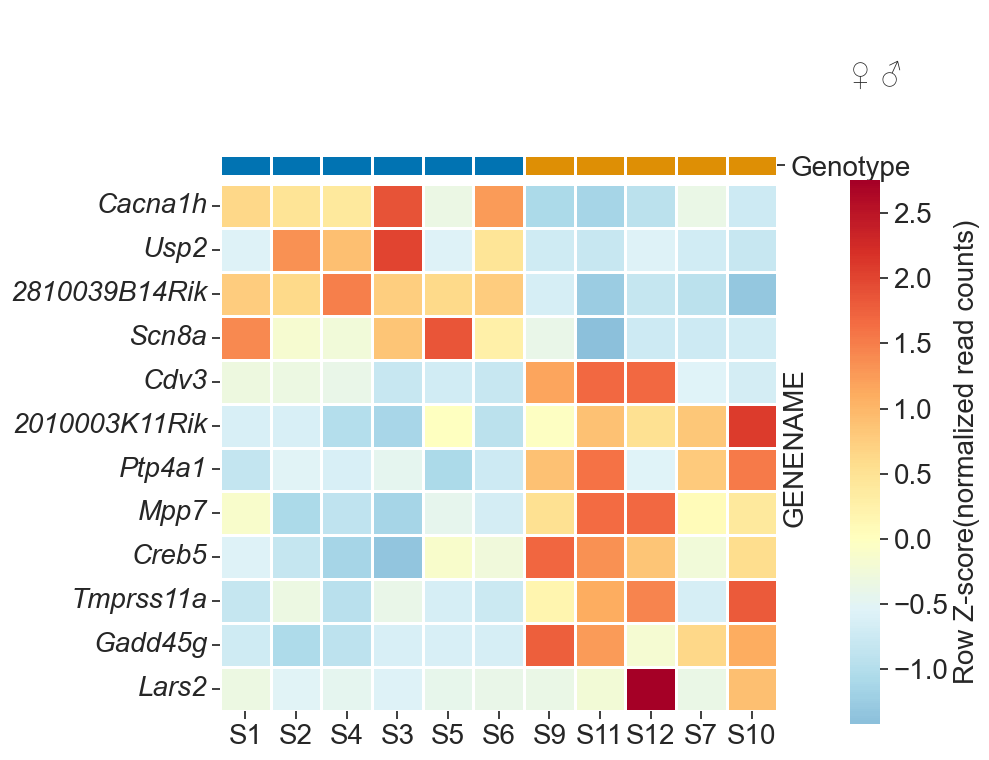

In [42]:
col_colors = pd.DataFrame({'Genotype': [color_palette[0], 
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[0],
                                        color_palette[1],
                                        color_palette[1],
                                        color_palette[1],
                                        color_palette[1],
                                        color_palette[1]]},
             index = ['S1','S2','S4','S3','S5','S6','S9','S11','S12','S7','S10'])
data = pd.concat([DE_down_counts_norm, DE_up_counts_norm])

data.columns = data.columns.str.replace("filtered_", "")\
                                .str.replace("_quant_filtered", "")
data = data.reindex(columns=['S1','S2','S4','S3','S5','S6','S9','S11','S12','S7','S10'])

heatmap_DE_genes = sns.clustermap(data, 
                figsize = (10,8),
                cbar_pos=(0.8, 0.07, 0.03, 0.68),
                cbar_kws = {"label": "Row Z-score(normalized read counts)"},
                col_cluster=False,
                row_cluster=False,
                center=0,
                z_score=0,
                cmap="RdYlBu_r",
                linewidths=1,
                col_colors=col_colors,
               xticklabels=data.columns.values, 
               yticklabels=data.index.values)

plt.text(0,3.5,"\u2640")
plt.text(1,3.5,"\u2642")


heatmap_DE_genes.ax_heatmap.yaxis.set_ticks_position('left')
for label in heatmap_DE_genes.ax_heatmap.get_yticklabels():
        # Here it sets all italic. 
        label.set_style("italic")

heatmap_DE_genes.savefig("RNASeq_heatmap_DE_genes_zscore_norm_counts.png", dpi=1200)
heatmap_DE_genes.savefig("RNASeq_heatmap_DE_genes_zscore_norm_counts.svg", dpi=1200)